Sales Table for Project Comp257

In [317]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [318]:
LGA = pd.read_excel('data/Sales-Tables-clean.xlsx', sheet_name= 1)

In [319]:
postcode = pd.read_excel('data/Sales-Tables-clean.xlsx', sheet_name=2)

In [320]:
LGA.shape

(2747, 14)

In [321]:
postcode.shape

(1332, 11)

In [322]:
LGA.replace(to_replace="s",value="",inplace=True)
LGA.replace(to_replace='-',value="",inplace=True)

In [323]:
LGA.head(10)

,GMR (Greater Metropolitan Region),Greater Sydney,Rings,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,Total,Total,Total,Total,Total,455.0,635.0,870.0,764.0,19558.0,-0.0231,-0.0508,-0.2309,-0.3087
1,Total,Total,Total,Total,Non Strata,440.0,630.0,895.0,779.0,13598.0,-0.0308,-0.0526,-0.2330,-0.2873
2,Total,Total,Total,Total,Strata,485.0,640.0,830.0,730.0,5960.0,-0.0303,-0.0448,-0.2262,-0.3530
3,Total,Total,Total,Albury,Total,240.0,320.0,415.0,340.0,198.0,0.0492,0.0492,-0.2414,-0.2747
4,Total,Total,Total,Albury,Non Strata,260.0,352.0,438.0,370.0,162.0,-0.0154,0.0430,-0.2430,-0.2249
5,Total,Total,Total,Albury,Strata,156.0,212.0,240.0,205.0,36.0,0.0012,-0.0128,-0.2340,-0.4375
6,Total,Total,Total,Armidale Regional,Total,265.0,350.0,459.0,355.0,87.0,0.0072,0.0145,-0.3256,-0.3308
7,Total,Total,Total,Armidale Regional,Non Strata,266.0,360.0,461.0,362.0,80.0,0.0141,0.0286,-0.3103,-0.3333
8,Total,Total,Total,Armidale Regional,Strata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total,Total,Total,Ballina,Total,500.0,577.0,730.0,635.0,116.0,-0.0580,-0.0738,-0.3626,-0.3895


In [324]:
LGA.dtypes

GMR (Greater Metropolitan Region)      object
Greater Sydney                         object
Rings                                  object
Local Government Areas (LGAs)          object
DwellingType                           object
First Quartile Sales Price\n$'000s    float64
Median Sales Price\n$'000s            float64
Third Quartile Sales Price\n'000s     float64
Mean Sales Price\n$'000s              float64
Sales\nNo.                            float64
Qtly change in Median                 float64
Annual change in Median               float64
Qtly change in Count                  float64
Annual change in Count                float64
dtype: object

In [325]:
LGA.columns

Index(['GMR (Greater Metropolitan Region)', 'Greater Sydney', 'Rings',
       'Local Government Areas (LGAs)', 'DwellingType',
       'First Quartile Sales Price\n$'000s', 'Median Sales Price\n$'000s',
       'Third Quartile Sales Price\n'000s', 'Mean Sales Price\n$'000s',
       'Sales\nNo.', 'Qtly change in Median', 'Annual change in Median',
       'Qtly change in Count', 'Annual change in Count'],
      dtype='object')

We have just checked the column titles for the LGA dataframe and now we are changing the name of the columns so it is easier in our analysis process

In [326]:
LGA.rename(columns={'GMR (Greater Metropolitan Region)':'GMR',
                    'Greater Sydney':'Greater_Sydney',
                    'Local Government Areas (LGAs)':'LGA',
                    'DwellingType':'Dwelling_Types',
                    'Sales No.':'Sales_No',
                    'Qtly change in Median':'Qtly_change_median',
                    'Annual change in Median':'Annual_change_median',
                    'Qtly change in Count':'Qtly_change_Count',
                    'Annual change in Count':'Annual_change_Count'},
           inplace=True)

In [327]:
LGA.head(10)

,GMR,Greater_Sydney,Rings,LGA,Dwelling_Types,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly_change_median,Annual_change_median,Qtly_change_Count,Annual_change_Count
0,Total,Total,Total,Total,Total,455.0,635.0,870.0,764.0,19558.0,-0.0231,-0.0508,-0.2309,-0.3087
1,Total,Total,Total,Total,Non Strata,440.0,630.0,895.0,779.0,13598.0,-0.0308,-0.0526,-0.2330,-0.2873
2,Total,Total,Total,Total,Strata,485.0,640.0,830.0,730.0,5960.0,-0.0303,-0.0448,-0.2262,-0.3530
3,Total,Total,Total,Albury,Total,240.0,320.0,415.0,340.0,198.0,0.0492,0.0492,-0.2414,-0.2747
4,Total,Total,Total,Albury,Non Strata,260.0,352.0,438.0,370.0,162.0,-0.0154,0.0430,-0.2430,-0.2249
5,Total,Total,Total,Albury,Strata,156.0,212.0,240.0,205.0,36.0,0.0012,-0.0128,-0.2340,-0.4375
6,Total,Total,Total,Armidale Regional,Total,265.0,350.0,459.0,355.0,87.0,0.0072,0.0145,-0.3256,-0.3308
7,Total,Total,Total,Armidale Regional,Non Strata,266.0,360.0,461.0,362.0,80.0,0.0141,0.0286,-0.3103,-0.3333
8,Total,Total,Total,Armidale Regional,Strata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total,Total,Total,Ballina,Total,500.0,577.0,730.0,635.0,116.0,-0.0580,-0.0738,-0.3626,-0.3895


In [328]:
LGA_clean =  LGA[LGA.Dwelling_Types != 'Total']

In [329]:
LGA_clean.shape

(1698, 14)

In [330]:
LGA_clean = LGA_clean[LGA_clean.LGA != 'Total']

In [331]:
LGA_clean.shape

(1632, 14)

In [332]:
LGA_clean.head(5)

,GMR,Greater_Sydney,Rings,LGA,Dwelling_Types,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly_change_median,Annual_change_median,Qtly_change_Count,Annual_change_Count
4,Total,Total,Total,Albury,Non Strata,260.0,352.0,438.0,370.0,162.0,-0.0154,0.0430,-0.2430,-0.2249
5,Total,Total,Total,Albury,Strata,156.0,212.0,240.0,205.0,36.0,0.0012,-0.0128,-0.2340,-0.4375
7,Total,Total,Total,Armidale Regional,Non Strata,266.0,360.0,461.0,362.0,80.0,0.0141,0.0286,-0.3103,-0.3333
8,Total,Total,Total,Armidale Regional,Strata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Total,Total,Total,Ballina,Non Strata,553.0,640.0,773.0,698.0,71.0,-0.0394,-0.1172,-0.4083,-0.4132


In [333]:
LGA_clean.describe()

,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly_change_median,Annual_change_median,Qtly_change_Count,Annual_change_Count
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,542.741176,663.017647,830.817647,710.747059,116.700000,-0.023752,-0.038986,-0.235526,-0.290775
std,452.694529,579.781608,783.646499,642.390633,120.187925,0.093909,0.113325,0.184617,0.156102
min,91.000000,133.000000,185.000000,150.000000,30.000000,-0.382400,-0.333300,-0.688900,-0.646300
25%,260.000000,335.000000,414.000000,344.000000,31.000000,-0.058800,-0.113800,-0.351400,-0.391300
50%,404.500000,490.000000,586.500000,510.000000,67.000000,-0.025550,-0.056650,-0.251250,-0.306450
75%,649.000000,721.000000,855.000000,757.000000,162.000000,0.005700,0.012500,-0.147500,-0.214300
max,2869.000000,3960.000000,5913.000000,4434.000000,845.000000,0.350000,0.445100,0.636400,0.307700


We can see from the result above, Early days of the year people don't have confidence to splash into realestate possibly because they want to observe trend in the market but as time goes by buyer will have more confidence in the market they acquire with higher price. Minimum Sales No. possibly in more expensive areas whereas the Max Sales Price is observed and Maximum Sales No. is possibly observed in areas where it is more affordable for everyone. We can also observe, people are recently loosing confidence in low price areas whereas higher confidence in terns of price is observed, in terms of count though the result is quite opposite.

In [334]:
LGA_clean.columns

Index(['GMR', 'Greater_Sydney', 'Rings', 'LGA', 'Dwelling_Types',
       'First Quartile Sales Price\n$'000s', 'Median Sales Price\n$'000s',
       'Third Quartile Sales Price\n'000s', 'Mean Sales Price\n$'000s',
       'Sales\nNo.', 'Qtly_change_median', 'Annual_change_median',
       'Qtly_change_Count', 'Annual_change_Count'],
      dtype='object')

C:\Users\sbnpr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sbnpr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


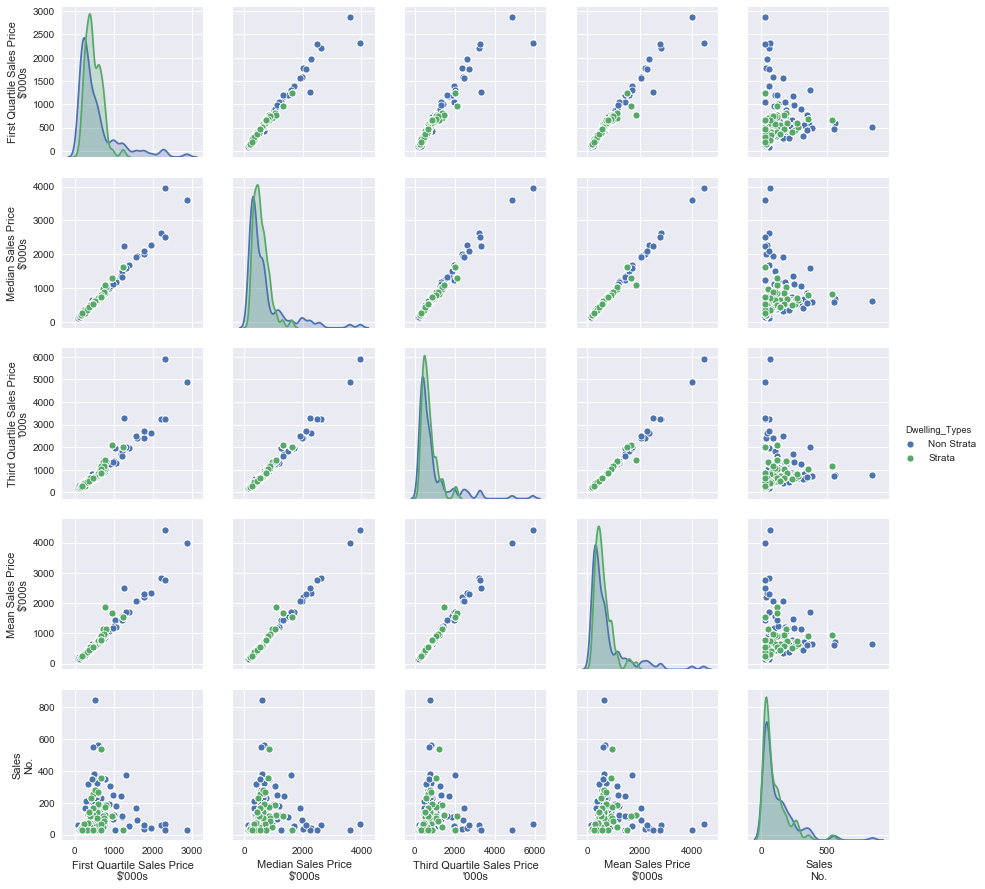

In [335]:
graph_dwell = sns.pairplot(LGA_clean,vars=['First Quartile Sales Price\n$\'000s',
       'Median Sales Price\n$\'000s',
       'Third Quartile Sales Price\n\'000s','Mean Sales Price\n$\'000s',
       'Sales\nNo.'],hue='Dwelling_Types')

In [336]:
##Blue non-strata, green strata##

From the above graph we can see overall, Sales No for both Strata and Non-strata property, as price whether it is First Quartile or Third Quartile, as Sale Price goes up, Sales No. starts declining. In Third Quartile, because of buyer's confidence we can quite a few Non-strata property being sold for voer 4 millions and lots of strata property in range of 2 millions which is not the case in First Quarter. Other than Sales No. for both types of properties, the relation between them looks positive since when one variable is increasing other also being positively affected, and usually the non-strata is outnumbering strata property in each relationship.

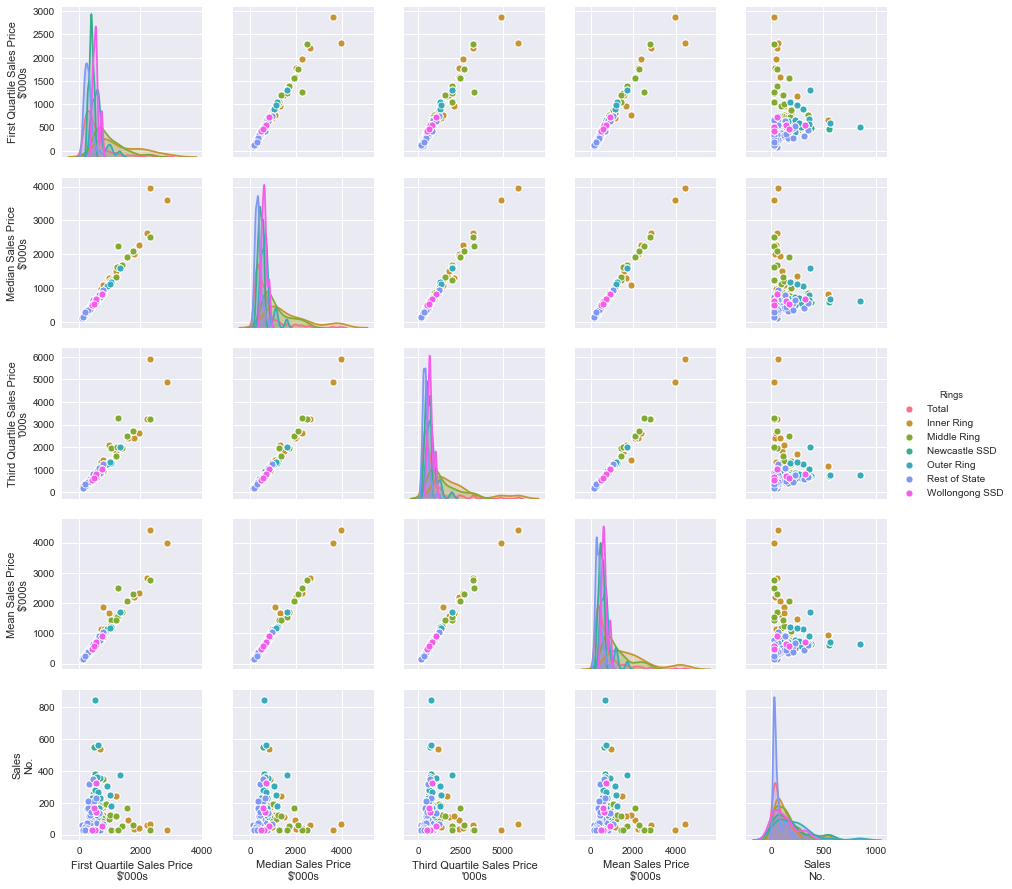

In [337]:
graph_ring = sns.pairplot(LGA_clean,vars=['First Quartile Sales Price\n$\'000s',
       'Median Sales Price\n$\'000s',
       'Third Quartile Sales Price\n\'000s','Mean Sales Price\n$\'000s',
       'Sales\nNo.'],hue='Rings')

From the graph above, we can see the most expensive house are in the inner ring whereas Rest of State and Woolongong SSD and Newcastle SSD are not as expensive as Inner Ring. We can also observe that houses in Inner Ring are almost impossible to be buy under the price of 2millions. On the other hand, we can see since the price is low, Sales No. is comparatively higher in those areas. This can be easily interpreted as people due to rising real estate price in inner sydney area, people are moving outside CBD where the price is under their budget. Rest of other variable are positively correlated to each other, and one distinct feature we can observe is the cluster between rest of the Rings but Inner Ring is looks quite far from rest to show the price difference to other areas. This make us think that why complain about House price hiking, just move to country then again, jobs, education and facility come into play for making these choices.

### Postcode Analysis###

In [338]:
postcode.head(10)

,Postcode,Dwelling Type,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,2000,Total,848.0,1160.0,1643.0,1348.0,103.0,-0.0169,-0.1375,-0.1043,-0.1488
1,2000,Non Strata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Strata,845.0,1135.0,1600.0,1322.0,101.0,-0.0340,-0.0920,-0.0734,-0.1062
3,2007,Total,280.0,641.0,650.0,517.0,30.0,-0.0642,-0.1097,-0.1333,-0.3158
4,2007,Strata,280.0,641.0,650.0,517.0,30.0,-0.0642,-0.1097,-0.1333,-0.3158
5,2008,Total,620.0,859.0,1200.0,869.0,30.0,-0.0012,0.0412,-0.5714,-0.4615
6,2008,Non Strata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2008,Strata,610.0,670.0,1075.0,837.0,30.0,-0.1677,-0.1213,-0.5870,-0.4412
8,2009,Total,950.0,1300.0,2300.0,1651.0,30.0,0.3065,0.1586,-0.5641,-0.5405
9,2009,Non Strata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
postcode.shape

(1332, 11)

In [340]:
postcode.dtypes

Postcode                                int64
Dwelling Type                          object
First Quartile Sales Price\n$'000s    float64
Median Sales Price\n$'000s            float64
Third Quartile Sales Price\n'000s     float64
Mean Sales Price\n$'000s              float64
Sales\nNo.                            float64
Qtly change in Median                 float64
Annual change in Median               float64
Qtly change in Count                  float64
Annual change in Count                float64
dtype: object

In [341]:
postcode.rename(columns={'Dwelling Type':'Dwelling_Types'}, inplace=True)

In [342]:
postcode_clean =  postcode[postcode.Dwelling_Types != 'Total']

In [343]:
postcode_clean.shape

(813, 11)

In [344]:
postcode_clean.head(5)

,Postcode,Dwelling_Types,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
1,2000,Non Strata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Strata,845.0,1135.0,1600.0,1322.0,101.0,-0.0340,-0.0920,-0.0734,-0.1062
4,2007,Strata,280.0,641.0,650.0,517.0,30.0,-0.0642,-0.1097,-0.1333,-0.3158
6,2008,Non Strata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2008,Strata,610.0,670.0,1075.0,837.0,30.0,-0.1677,-0.1213,-0.5870,-0.4412


In [345]:
postcode_clean.describe()

,Postcode,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
count,813.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,480.000000,481.000000,480.000000
mean,2357.340713,698.927235,817.632017,1010.182952,881.018711,42.108108,-0.019325,-0.064052,-0.164081,-0.243294
std,259.725700,467.875973,554.888145,823.368844,641.767499,24.189976,0.114500,0.129746,0.300795,0.235227
min,2000.000000,91.000000,133.000000,194.000000,150.000000,30.000000,-0.417000,-0.477700,-0.702100,-0.750000
25%,2136.000000,409.000000,485.000000,570.000000,496.000000,30.000000,-0.078900,-0.131675,-0.336400,-0.388900
50%,2299.000000,606.000000,681.000000,783.000000,711.000000,30.000000,-0.025600,-0.078250,-0.222200,-0.277800
75%,2549.000000,795.000000,970.000000,1180.000000,1040.000000,43.000000,0.032300,-0.006775,-0.073400,-0.132575
max,3691.000000,5000.000000,5700.000000,8050.000000,6568.000000,198.000000,0.582100,0.520000,2.000000,0.888900


From above, we can see minimum First Quartile Sales Price is less than 50 times lesser compared to maximum of over 5 millions. Similar to LGA data, heading past middle of the year, buyer are happy to pay more compared to earlier months which we can see from minimum Sales Price jumping from 91000 to 19400 and maximum Sales Price going over 8million from under 6million from First Quartile Sales to Third Quartile . The minimum Sales No. for the year by the postcode was 30 whereas Maximum was almost 7 times of that. If we look at the change in Count, due to rocketing price in realestate market, people seem to have lost confidence in investing money.

In [346]:
postcode_clean.columns

Index(['Postcode', 'Dwelling_Types', 'First Quartile Sales Price\n$'000s',
       'Median Sales Price\n$'000s', 'Third Quartile Sales Price\n'000s',
       'Mean Sales Price\n$'000s', 'Sales\nNo.', 'Qtly change in Median',
       'Annual change in Median', 'Qtly change in Count',
       'Annual change in Count'],
      dtype='object')

C:\Users\sbnpr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sbnpr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


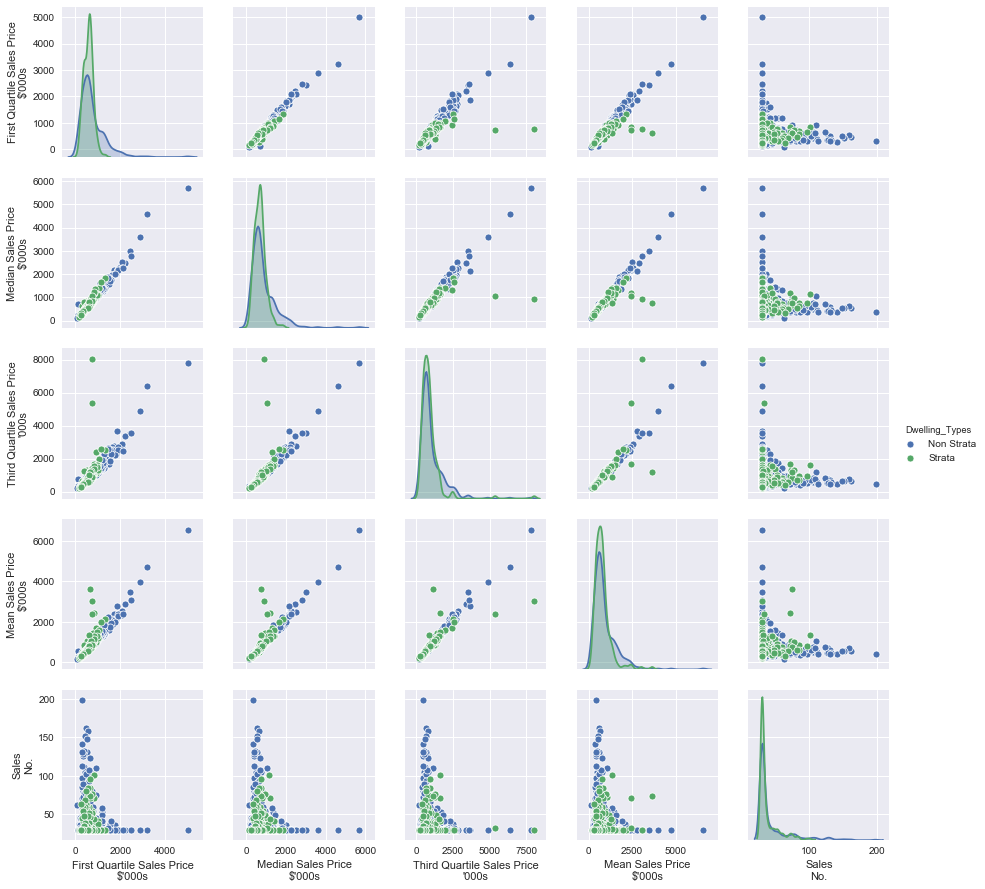

In [350]:
postcode_clean.plot = sns.pairplot(postcode_clean,vars=['First Quartile Sales Price\n$\'000s',
       'Median Sales Price\n$\'000s',
       'Third Quartile Sales Price\n\'000s','Mean Sales Price\n$\'000s',
       'Sales\nNo.'],hue='Dwelling_Types')